In [1]:
#imports
import numpy as np
from Bio import Phylo
import pandas as pd

# Background

The purpose of this project is to investigate if codon bias is an indicator for phylogenetic relationships. If codon bias does prove to be an indicator, this could be used to increase understanding of the relationship between different organisms. A csv file containing the codon bias for many different organisms was taken from Kaggle (source?). TO make the project more manageable, rodents were selected to be the focus on the project. The data was analyzed by creating a data frame and using pandas techniques from BIOL300 such as reading in a file and indexing a data frame. To create a phylogenetic tree, the algorithm UPGMA from BIOL301 was used. 

# Part 1 - Preparing the Data

First, the csv file must be read into the file as a data frame. This was done using Pandas a skills from BIOL300. 

In [2]:
#read file into a data frame
f = open('codon_usage.csv', 'r')
df = pd.read_csv(f);

C:\Users\astro\AppData\Local\Temp\ipykernel_11144\851024513.py:3: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f);


The csv files is quite large, so it was decreased in size to be more manageable. Rodents were selected as the subject of this study, so all animals labeled as in the rodent kingdom were added to a new data frame. Then, since this data included codon bias for mitochondrial DNA, that was also removed to limit the scope of this project. 

In [41]:
#parse out only columns labeled as 'rod' (rodents)
rodents_with_mit = df[df['Kingdom'] == 'rod']

#remove the mitocondrial DNA by using the DNAtype column
rodents = rodents_with_mit[rodents_with_mit['DNAtype'] == 0]

In [42]:
#limit the number of rodents and print out dataframe
rodents = rodents[8:13]
rodents

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
12645,rod,0,10036,141900,Mesocricetus auratus,0.01743,0.02507,0.00541,0.01319,0.01261,...,0.00980,0.01096,0.01113,0.01971,0.02850,0.02467,0.03870,0.00066,0.00066,0.00124
12646,rod,0,10041,1400,Peromyscus leucopus,0.01571,0.03214,0.00357,0.01500,0.00571,...,0.00571,0.00357,0.00857,0.01643,0.03429,0.01857,0.02857,0.00214,0.00143,0.00500
12647,rod,0,10042,38901,Peromyscus maniculatus,0.00925,0.03748,0.00075,0.00288,0.00781,...,0.00308,0.00298,0.00848,0.01661,0.04224,0.01049,0.02419,0.00463,0.00013,0.00162
12649,rod,0,10044,5133,Phodopus sungorus,0.01422,0.03098,0.00370,0.01208,0.01383,...,0.01033,0.01071,0.01052,0.01286,0.02318,0.01033,0.02572,0.00117,0.00019,0.00214
12650,rod,0,10047,24224,Meriones unguiculatus,0.01701,0.02778,0.00483,0.01218,0.01255,...,0.00755,0.01280,0.01016,0.01841,0.02758,0.02349,0.03513,0.00107,0.00083,0.00099


The csv file contained codon bias across the entire genome. It was decided to normalize these percentages for each amino acid. This removed any amino acid bias between species and focuses just on the codon bias. To accomplish this, a dictionary was created to correlate each codon to a specific amino acid (source?). Multiple checks were performed to make sure all amino acids and codons were present and there were no typos. 

In [43]:
#create dictionary of amino acids and corresponding codons
aas = {'Phe': ['UUU','UUC'], 'Leu': ['UUA','UUG','CUU','CUC','CUA','CUG'], 'Ile': ['AUU','AUC','AUA'], 'Met': ['AUG'], 'Val': ['GUU','GUC','GUA','GUG'],
       'Ser': ['UCU','UCC','UCA','UCG','AGU','AGC'], 'Pro': ['CCU','CCC','CCA','CCG'], 'Thr': ['ACU','ACC','ACA','ACG'], 'Ala': ['GCU','GCC','GCA','GCG'], 
       'Tyr': ['UAU','UAC'], '***': ['UAA','UAG','UGA'], 'Trp': ['UGG'], 'His': ['CAU','CAC'], 'Gln': ['CAA','CAG'], 'Asn': ['AAU','AAC'], 'Lys': ['AAA','AAG'],
       'Cys': ['UGU','UGC'], 'Arg': ['CGU','CGC','CGA','CGG','AGA','AGG'], 'Gly': ['GGU','GGC','GGA','GGG'], 'Asp': ['GAU','GAC'], 'Glu': ['GAA','GAG']}

In [44]:
#check that all amino acids are in dictionary (20+stop = 21)
len(aas)

21

In [45]:
#check that all codons are included in dictionary (should be 64)
count = 0
for i in aas:
    count += len(aas[i])
    
print(count)

64


Once the dictionary was completed and checked, it was used to standardize by amino acid. By iterating through the dictionary, it was established how often each codon was used to create a certain amino acid for each animal. These new percentages were then added to the data frame, replacing the former percentages which accounted for the whole genome. The data frame was then printed to make sure the data frame was updated

In [46]:
#standarize by amino acid

#loop through each animal
for animal in rodents['SpeciesName']:
    species_bool = rodents['SpeciesName'] == animal
    species = rodents[species_bool]
    
    #loop through all amino acids
    for aa in aas:
        #initalize total percent of amino acid
        total = 0 
        
        #loop through codons and add up percentages
        for codon in aas[aa]:
            total += species[codon]
        
        #loop through codons, normalize by amino acid, and replace in data frame
        for codon in aas[aa]:
            rodents.loc[species_bool, [codon]] = species[codon]/total

In [47]:
#print rodents to make sure it updated 
rodents

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
12645,rod,0,10036,141900,Mesocricetus auratus,0.410118,0.589882,0.054051,0.131781,0.125987,...,0.186206,0.208246,0.211476,0.408836,0.591164,0.389301,0.610699,0.257812,0.257812,0.484375
12646,rod,0,10041,1400,Peromyscus leucopus,0.328318,0.671682,0.027614,0.116027,0.044168,...,0.166569,0.104142,0.250000,0.323935,0.676065,0.393933,0.606067,0.249708,0.166861,0.583431
12647,rod,0,10042,38901,Peromyscus maniculatus,0.197946,0.802054,0.006198,0.023802,0.064545,...,0.092409,0.089409,0.254425,0.282243,0.717757,0.302480,0.697520,0.725705,0.020376,0.253918
12649,rod,0,10044,5133,Phodopus sungorus,0.314602,0.685398,0.031602,0.103177,0.118124,...,0.195644,0.202841,0.199242,0.356826,0.643174,0.286546,0.713454,0.334286,0.054286,0.611429
12650,rod,0,10047,24224,Meriones unguiculatus,0.379772,0.620228,0.046649,0.117636,0.121209,...,0.152003,0.257701,0.204550,0.400304,0.599696,0.400716,0.599284,0.370242,0.287197,0.342561


Once the data was cleaned and standardized by amino acid, a distance function was created to determine the distance between two species. It was decided to use a sum of squares. The squared difference between each codon was added together and the total difference returned to determine how different codon bias between species is.

In [48]:
def species_diff(df, species1, species2):
    # finds the difference between the codon bias of two species
    
    # step a counting value to 0
    diff = 0
    
    animal1 = df[df['SpeciesName'] == species1]
    animal2 = df[df['SpeciesName'] == species2]
    
    #loop through all amino acids
    for aa in aas:
        #loop through all codons
        for codon in aas[aa]:
            #add the squared difference between the species codon bias squared
            diff += (animal1[codon].values[0] - animal2[codon].values[0])**2
    
    #return the total difference between two speices
    return diff         

# Part 2 - UPGMA

In [11]:
class Node:
    def __init__(self):
        self.left = None
        self.right = None
        self.val = None

To test the method, the example from class was used. This uses sequences instead of codon bias, so must first define a difference function for sequences. This function assumes that the sequences are the same length which is a safe assumption since this is just being used to test phenogentic tree formation and not generalized to other sequences

In [12]:
def differences(seq1, seq2):
    '''Counts the number of pairwise differences between
    two sequences'''
    
    #set count variable to zero
    count = 0
    
    #loop through the first sequence
    for i in range(len(seq1)):
        
        #if the amino acids don't match, increase the count variable by one
        if seq1[i] != seq2[i]:
            count += 1

    #once the entire sequence has been checked, return the count variable        
    return count

Next, all of the hemoglobin sequences must be defined. This information was taken from the notebook used in class

In [13]:
human =   "MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF.DLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR"
chimp =   "MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF.DLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR"
gorilla = ".VLSPADKTNVKAAWGKVGAHAGDYGAEALERMFLSFPTTKTYFPHF.DLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR"
cow =     "MVLSAADKGNVKAAWGKVGGHAAEYGAEALERMFLSFPTTKTYFPHF.DLSHGSAQVKGHGAKVAAALTKAVEHLDDLPGALSELSDLHAHKLRVDPVNFKLLSHSLLVTLASHLPSDFTPAVHASLDKFLANVSTVLTSKYR"
horse =   "MVLSAADKTNVKAAWSKVGGHAGEYGAEALERMFLGFPTTKTYFPHF.DLSHGSAQVKAHGKKVGDALTLAVGHLDDLPGALSNLSDLHAHKLRVDPVNFKLLSHCLLSTLAVHLPNDFTPAVHASLDKFLSSVSTVLTSKYR"  
donkey =  "MVLSAADKTNVKAAWSKVGGNAGEFGAEALERMFLGFPTTKTYFPHF.DLSHGSAQVKAHGKKVGDALTLAVGHLDDLPGALSNLSDLHAHKLRVDPVNFKLLSHCLLSTLAVHLPNDFTPAVHASLDKFLSTVSTVLTSKYR" 
rabbit =  ".VLSPADKTNIKTAWEKIGSHGGEYGAEAVERMFLGFPTTKTYFPHF.DFTHGSZQIKAHGKKVSEALTKAVGHLDDLPGALSTLSDLHAHKLRVDPVNFKLLSHCLLVTLANHHPSEFTPAVHASLDKFLANVSTVLTSKYR"
carp =    "MSLSDKDKAAVKGLWAKISPKADDIGAEALGRMLTVYPQTKTYFAHWADLSPGSGPVKKHGKVIMGAVGDAVSKIDDLVGGLAALSELHAFKLRVDPANFKILAHNVIVVIGMLYPGDFPPEVHMSVDKFFQNLALALSEKYR"

A list of all of the hemoglobin sequences and a list of all of the nodes must be created so they can be used later on to find differences and to create the phenogenetic tree

In [14]:
#create list of all hemoglobin sequences
animals = [carp, cow, donkey, horse, human, gorilla, rabbit]

#create list of all animals and string to be used as nodes
nodes = ["carp", "cow", "donkey", "horse", "human", "gorilla", "rabbit"]

Then, a dictionary of all of the differences between each animal must be created. To do this, a function was created which took in the lists created above. It takes in the hemoglobin sequences and the list of animal names. Then, it uses the difference function above to determine the difference between each animal pair. Finally, it adds each animal pair to the difference dictionary and returns the dictionary

In [15]:
def create_diff_dict(animals, nodes):
    '''Creates a matrix of differences between the given species.
    Stored in a dictionary of dictionary based on the indices of 
    the provided list.'''
    
    diff_dict = {}

    for i, animal1 in enumerate(nodes):
        for j, animal2 in enumerate(nodes):
            if(animal1 == animal2):
                continue
                
            diff = differences(animals[i], animals[j])

            if(not animal1 in diff_dict):
                diff_dict[animal1] = {}

            if(not animal2 in diff_dict):
                diff_dict[animal2] = {}

            diff_dict[animal1][animal2] = diff
            diff_dict[animal2][animal1] = diff
        
    return diff_dict

In [16]:
create_diff_dict(animals, nodes)

{'carp': {'cow': 70,
  'donkey': 71,
  'horse': 71,
  'human': 72,
  'gorilla': 72,
  'rabbit': 76},
 'cow': {'carp': 70,
  'donkey': 19,
  'horse': 17,
  'human': 17,
  'gorilla': 19,
  'rabbit': 26},
 'donkey': {'carp': 71,
  'cow': 19,
  'horse': 3,
  'human': 20,
  'gorilla': 22,
  'rabbit': 26},
 'horse': {'carp': 71,
  'cow': 17,
  'donkey': 3,
  'human': 17,
  'gorilla': 19,
  'rabbit': 24},
 'human': {'carp': 72,
  'cow': 17,
  'donkey': 20,
  'horse': 17,
  'gorilla': 2,
  'rabbit': 26},
 'gorilla': {'carp': 72,
  'cow': 19,
  'donkey': 22,
  'horse': 19,
  'human': 2,
  'rabbit': 26},
 'rabbit': {'carp': 76,
  'cow': 26,
  'donkey': 26,
  'horse': 24,
  'human': 26,
  'gorilla': 26}}

In [17]:
def pair_group(diff_dict):
    """ given a matrix of differences, returns the indices of the closest two related organisms"""
    
    min_val = np.inf
    index_1 = 0
    index_2 = 0
    
    for i in diff_dict.keys():
        for j in diff_dict[i].keys():
            if diff_dict[i][j] < min_val:
                min_val = diff_dict[i][j]
                index_1 = i
                index_2 = j
    
    return (index_1, index_2)

In [18]:
pair_group(create_diff_dict(animals, nodes))

('human', 'gorilla')

In [19]:
def calculate_weight(tup):
    '''Determine number of items in a nested tuple'''
    if(type(tup) != tuple):
        return 1
    
    num_values = 0
    
    for i in tup:
        if type(i) == tuple:
            num_values += calculate_weight(i)
        else:
            num_values += 1
            
    return num_values

In [20]:
def get_distance_to_farthest_node(root):
    if(root.right == None):
        return 0
    
    return root.right[1] + get_distance_to_farthest_node(root.right[0])

In [21]:
def generate_phylogenetic_tree(diff_dict):
    '''Creates a phylogentic tree from a list of sequences'''
    
    # Create the dictionary of nodes for the phylogentic tree creation
    node_dict = {}

    for species in diff_dict:
        node = Node()
        node.val = species
        node_dict[species] = node

    # Apply UPGMA until all nodes have been combined
    while(len(diff_dict.keys()) > 1):
        # Get most related nodes
        (animal_1, animal_2) = pair_group(diff_dict)
        
        # Add a new row for the new node
        new_node = (animal_1, animal_2)
        diff_dict[new_node] = {}
        
        distance = diff_dict[animal_1][animal_2]
        
        node = Node()
        node.val = new_node
        node.left = (node_dict[animal_1], distance / 2 - get_distance_to_farthest_node(node_dict[animal_1]))
        node.right = (node_dict[animal_2], distance / 2 - get_distance_to_farthest_node(node_dict[animal_2]))
        
        node_dict.pop(animal_1)
        node_dict.pop(animal_2)
        node_dict[new_node] = node
        
        # Delete node pairs from dictionary
        diff_dict[animal_1].pop(animal_2)
        diff_dict[animal_2].pop(animal_1)


        # Calculate the weights for the arithmetic mean
        weight1 = calculate_weight(animal_1)
        weight2 = calculate_weight(animal_2)

        # Populate new node's row
        for i in diff_dict[animal_1].keys():
            diff_dict[new_node][i] = (weight1 * diff_dict[animal_1][i] + weight2 * diff_dict[animal_2][i]) / (weight1 + weight2)

        # Delete old nodes' rows
        diff_dict.pop(animal_1)
        diff_dict.pop(animal_2)

        # Update remaining nodes' distances to the newly added node and delete the remaining
        # references to the old nodes
        for i in diff_dict.keys():
            if(i != new_node):
                diff_dict[i][new_node] = (weight1 * diff_dict[i][animal_1] + weight2 * diff_dict[i][animal_2]) / (weight1 + weight2)
                
                diff_dict[i].pop(animal_1)
                diff_dict[i].pop(animal_2)
    
    # The last created node is the completed tree
    return node

In [22]:
def create_tree(tree, nodes):
    '''Generates a string based tree from a list of indices given a list of strings
    to map the indices to'''
    
    out = [0, 0]
    for i in range(len(tree)):
        if type(tree[i]) == tuple:
            out[i] = create_tree(tree[i], nodes)
        else:
            out[i] = nodes[tree[i]]
            
    return tuple(out)

In [23]:
# Create matrix of differences
diff_dict = create_diff_dict(animals, nodes)

# Create Node based tree
index_tree = generate_phylogenetic_tree(diff_dict)
index_tree.val

('carp', ('rabbit', (('donkey', 'horse'), ('cow', ('human', 'gorilla')))))

In [24]:
def write_tree_xml(root, filename):
    with open(filename + '.xml', 'w') as f:
        f.write('<?xml version="1.0" encoding="UTF-8"?>\n')
        f.write('<phyloxml xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.phyloxml.org http://www.phyloxml.org/1.10/phyloxml.xsd" xmlns="http://www.phyloxml.org">\n')
        f.write('<phylogeny rooted="true">\n')
        f.write('<clade>')
        
        write_tree_recursive(root, f)
        
        f.write('</clade>\n')
        f.write('</phylogeny>\n')
        f.write('</phyloxml>\n')

In [25]:
def write_tree_recursive(root, f):
    if(root.right == None):
        f.write('<name>' + root.val + '</name>\n')
        return
    
    f.write('<clade branch_length="' + str(root.right[1]) + '">\n')
    write_tree_recursive(root.right[0], f)
    f.write('</clade>\n')
    
    f.write('<clade branch_length="' + str(root.left[1]) + '">\n')
    write_tree_recursive(root.left[0], f)
    f.write('</clade>\n')

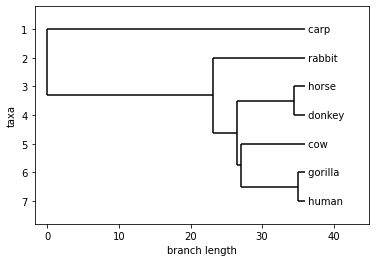

In [26]:
# Generate PhyloXML file
write_tree_xml(index_tree, 'test_tree')

# Load and visualize phylogenetic tree
tree = Phylo.read('test_tree.xml', 'phyloxml')
tree.ladderize()
Phylo.draw(tree)

# Part 3 - Creating a Tree of Rodents

In [49]:
def create_diff_codon_dict(df):
    diff_dict = {}
    
    for species1 in df['SpeciesName'].unique():
        for species2 in df['SpeciesName'].unique():
    
            if(species1 == species2):
                continue

            diff = species_diff(df, species1, species2)

            if(not species1 in diff_dict):
                diff_dict[species1] = {}

            if(not species2 in diff_dict):
                diff_dict[species2] = {}

            diff_dict[species1][species2] = diff
            diff_dict[species2][species1] = diff
        
    return diff_dict

In [50]:
create_diff_codon_dict(rodents)

{'Mesocricetus auratus': {'Peromyscus leucopus': 0.3698200718995884,
  'Peromyscus maniculatus': 1.4912752525913675,
  'Phodopus sungorus': 0.2400149379280606,
  'Meriones unguiculatus': 0.06934837109831807},
 'Peromyscus leucopus': {'Mesocricetus auratus': 0.3698200718995884,
  'Peromyscus maniculatus': 0.9703578458774655,
  'Phodopus sungorus': 0.23958614945385504,
  'Meriones unguiculatus': 0.4298882360781917},
 'Peromyscus maniculatus': {'Mesocricetus auratus': 1.4912752525913675,
  'Peromyscus leucopus': 0.9703578458774655,
  'Phodopus sungorus': 1.224049008662283,
  'Meriones unguiculatus': 1.3523579218952508},
 'Phodopus sungorus': {'Mesocricetus auratus': 0.2400149379280606,
  'Peromyscus leucopus': 0.23958614945385504,
  'Peromyscus maniculatus': 1.224049008662283,
  'Meriones unguiculatus': 0.29665002218862124},
 'Meriones unguiculatus': {'Mesocricetus auratus': 0.06934837109831807,
  'Peromyscus leucopus': 0.4298882360781917,
  'Peromyscus maniculatus': 1.3523579218952508,
 

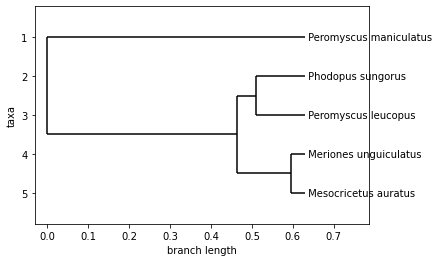

In [51]:
# Create matrix of differences
diff_dict = create_diff_codon_dict(rodents)

# Create Node based tree
index_tree = generate_phylogenetic_tree(diff_dict)

# Generate PhyloXML file
write_tree_xml(index_tree, 'rodent_tree')

# Load and visualize phylogenetic tree
tree = Phylo.read('rodent_tree.xml', 'phyloxml')
tree.ladderize()
Phylo.draw(tree)

# Part 4 - Creating Tree of In Class Animals

First, a list with the scientific names of each animal in class was created so they could be found in the data frame. Carp was replaced with trout because carp was not in the data frame. It was assumed that the two fish should have a similar relation to the rest of the animals which are all mammals

In [71]:
#create list of animal scientific names (carp replaced with trout)
animals = ['Homo sapiens', 'Gorilla gorilla', 'Oryctolagus cuniculus', 'Bos taurus', 'Equus asinus','Equus caballus', 'Oncorhynchus mykiss'] 

Next, a data frame had to be created for all of the inclass animals. First, the list of animals was looped through. If it was the first animal, a new data frame was created. If it was no, the new animal was added to the growing data frame using the pd.concat function which combines two data frames. Finally, the data frame was printed out to make sure it had been created properly. This could then be used in future steps

In [72]:

#loop through list of animals
for animal in animals:
    #if first animal, create new data frame
    if animal == animals[0]:
        class_animals = df[df['SpeciesName'] == animal]
    #otherwise, add the new animal to the growing data frame
    else: 
        class_animals = pd.concat([class_animals, df[df['SpeciesName'] == animal]])

#print data frame to make sure it is all present
class_animals

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156
13015,pri,0,9593,99020,Gorilla gorilla,0.01754,0.02389,0.00755,0.01321,0.01325,...,0.00974,0.01495,0.01289,0.01662,0.02218,0.02289,0.03689,0.00086,0.00072,0.00179
12631,mam,0,9986,529901,Oryctolagus cuniculus,0.01636,0.02844,0.00533,0.01095,0.01006,...,0.01143,0.00919,0.01057,0.01757,0.03049,0.02421,0.04372,0.00059,0.00053,0.00110
12613,mam,0,9913,5198458,Bos taurus,0.01638,0.02234,0.00634,0.01203,0.01186,...,0.01249,0.01074,0.01136,0.02053,0.02816,0.02692,0.04192,0.00070,0.00063,0.00132
12567,mam,0,9793,4974,Equus asinus,0.02694,0.03418,0.00462,0.01548,0.01508,...,0.00503,0.01206,0.01508,0.01528,0.02111,0.01749,0.02413,0.00221,0.00080,0.00201
12569,mam,0,9796,156469,Equus caballus,0.01737,0.02451,0.00569,0.01264,0.01282,...,0.00906,0.01086,0.01107,0.02002,0.02808,0.02502,0.04058,0.00098,0.00051,0.00123
11692,vrt,0,8022,353342,Oncorhynchus mykiss,0.01411,0.02659,0.00380,0.00977,0.00854,...,0.00589,0.01135,0.01412,0.01750,0.03334,0.01548,0.04519,0.00081,0.00050,0.00134


The codon bias was standarized by amino acid. This was done in the same fashion as previously to create a data frame with codon bias for each amino acid

In [73]:
#standarize by amino acid

#loop through each animal
for animal in class_animals['SpeciesName']:
    species_bool = class_animals['SpeciesName'] == animal
    species =  class_animals[species_bool]
    
    #loop through all amino acids
    for aa in aas:
        #initalize total percent of amino acid
        total = 0 
        
        #loop through codons and add up percentages
        for codon in aas[aa]:
            total += species[codon]
        
        #loop through codons, normalize by amino acid, and replace in data frame
        for codon in aas[aa]:
             class_animals.loc[species_bool, [codon]] = species[codon]/total

In [ ]:
#print the data frame to make sure each codon column has been correctly updated
class_animals

: 

Once the data frame has been correctly created, it can be used to create a difference dictionary. This was done using the previously defined create_diff_codon_dict function. 

In [75]:

#create dictionary of difference for class animals
create_diff_codon_dict(class_animals)

{'Homo sapiens': {'Gorilla gorilla': 0.02443789311971261,
  'Oryctolagus cuniculus': 0.24826376470476216,
  'Bos taurus': 0.05313818861699202,
  'Equus asinus': 0.35914121108476615,
  'Equus caballus': 0.06435768818250565,
  'Oncorhynchus mykiss': 0.32169389399993137},
 'Gorilla gorilla': {'Homo sapiens': 0.02443789311971261,
  'Oryctolagus cuniculus': 0.23013620546614208,
  'Bos taurus': 0.0576311559611267,
  'Equus asinus': 0.357124487446245,
  'Equus caballus': 0.06810767531135295,
  'Oncorhynchus mykiss': 0.26483562383024917},
 'Oryctolagus cuniculus': {'Homo sapiens': 0.24826376470476216,
  'Gorilla gorilla': 0.23013620546614208,
  'Bos taurus': 0.07853291124307733,
  'Equus asinus': 0.3252056404489305,
  'Equus caballus': 0.10583784047025326,
  'Oncorhynchus mykiss': 0.1539702829947261},
 'Bos taurus': {'Homo sapiens': 0.05313818861699202,
  'Gorilla gorilla': 0.0576311559611267,
  'Oryctolagus cuniculus': 0.07853291124307733,
  'Equus asinus': 0.2999421615519414,
  'Equus caball

Finally, a tree can be created of all of the animals used in class. This was done the same was as previously done. 

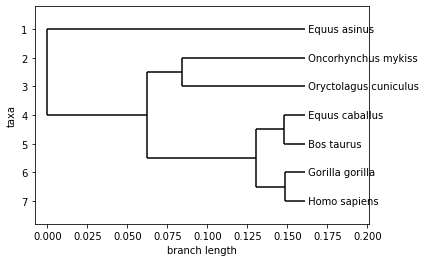

In [76]:
# Create matrix of differences
diff_dict = create_diff_codon_dict(class_animals)

# Create Node based tree
index_tree = generate_phylogenetic_tree(diff_dict)

# Generate PhyloXML file
write_tree_xml(index_tree, 'animal_tree')

# Load and visualize phylogenetic tree
tree = Phylo.read('animal_tree.xml', 'phyloxml')
tree.ladderize()
Phylo.draw(tree)

# Results and Discussion

# Next Steps

Future steps in this project could explore this method with a larger data set to confirm if the results hold true. The mitocondiral data could be used to see if that would be able to create a more accurate phenogenetic tree. Mitocondrial DNA could also be compared to bacteria to track the relationship between mitocondria and modern bacteria. Finally, the discripancies in the tree created could be explored to determine the cause of the discripancies